In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import os
import plotly.express as px
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
#Get working directory
current_dir = os.getcwd()
#go one directory up to root directory
project_root_dir = os.path.dirname(current_dir)
#Define path to data files
data_dir = os.path.join(project_root_dir, 'data')
raw_dir = os.path.join(data_dir, 'raw')
processed_dir = os.path.join(data_dir, 'processed')
#Define path to results folder
results_dir = os.path.join(project_root_dir, 'results')
#Define path to results folder
docs_dir = os.path.join(project_root_dir, 'docs')

#Create directories if they do not exist
os.makedirs(raw_dir, exist_ok=True)
os.makedirs(processed_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)
os.makedirs(docs_dir, exist_ok=True)

In [5]:
merged_data_filename = os.path.join(processed_dir, "Video_Comments_DS.csv")
merged_df = pd.read_csv(merged_data_filename)
merged_df.head(5)

,videoId,authorDisplayName,textDisplay,commentLikeCount,commentPublishedAt,clean_text,title,videoPublishedAt,viewCount,videoLikeCount,commentCount,tags,description
0,UN5qgBk6MwY,@iliya-malecki,Id prefer to watch a video on one of the great...,0,2025-06-25 23:29:49+00:00,id prefer watch video one greatest minds human...,Terence Tao on Grigori Perelman declining the ...,2025-06-19 23:23:00+00:00,167222,3301,60,[],Null
1,UN5qgBk6MwY,@4D_art,Grigori “Pearl”man .,0,2025-06-25 20:48:16+00:00,grigori pearlman,Terence Tao on Grigori Perelman declining the ...,2025-06-19 23:23:00+00:00,167222,3301,60,[],Null
2,UN5qgBk6MwY,@tomorrows-med,Pure genius,0,2025-06-25 14:04:09+00:00,pure genius,Terence Tao on Grigori Perelman declining the ...,2025-06-19 23:23:00+00:00,167222,3301,60,[],Null
3,UN5qgBk6MwY,@extavwudda,I am so sick of Lex sucking up to people,0,2025-06-25 06:08:24+00:00,sick lex sucking people,Terence Tao on Grigori Perelman declining the ...,2025-06-19 23:23:00+00:00,167222,3301,60,[],Null
4,UN5qgBk6MwY,@michealvallieres9228,Dude why would you interview a guy that's neve...,0,2025-06-23 23:40:40+00:00,dude would interview guy thats never met right...,Terence Tao on Grigori Perelman declining the ...,2025-06-19 23:23:00+00:00,167222,3301,60,[],Null


In [7]:
merged_df.columns

Index(['videoId', 'authorDisplayName', 'textDisplay', 'commentLikeCount',
       'commentPublishedAt', 'clean_text', 'title', 'videoPublishedAt',
       'viewCount', 'videoLikeCount', 'commentCount', 'tags', 'description'],
      dtype='object')

In [9]:
merged_df.shape

(4682, 13)

In [11]:
merged_df.describe()

,commentLikeCount,viewCount,videoLikeCount,commentCount
count,4682.000000,4.682000e+03,4682.000000,4682.000000
mean,17.581375,2.291699e+06,39720.072405,7926.867364
std,226.555763,2.768845e+06,51421.086714,14278.366583
min,0.000000,7.871500e+04,1805.000000,60.000000
25%,0.000000,7.582930e+05,11562.000000,1379.000000
50%,0.000000,1.406629e+06,22439.000000,3168.000000
75%,0.000000,2.400631e+06,41526.000000,7984.000000
max,6113.000000,1.670751e+07,271831.000000,77679.000000


In [13]:
merged_df.describe(include='object')

,videoId,authorDisplayName,textDisplay,commentPublishedAt,clean_text,title,videoPublishedAt,tags,description
count,4682,4682,4682,4682,4353,4682,4682,4682,4682
unique,94,3831,4618,4679,4248,94,94,87,92
top,pwN8u6HFH8U,@lexfridman,❤,2024-05-14 01:05:43+00:00,thank,"Paul Rosolie: Jungle, Apex Predators, Aliens, ...",2024-05-15 18:03:07+00:00,[],Null
freq,50,89,11,2,7,50,50,384,134


### 1. Publishing Trend Analysis

C:\Users\user\AppData\Local\Temp\ipykernel_17620\3237642744.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  merged_df['month'] = merged_df['videoPublishedAt'].dt.to_period('M').astype(str)


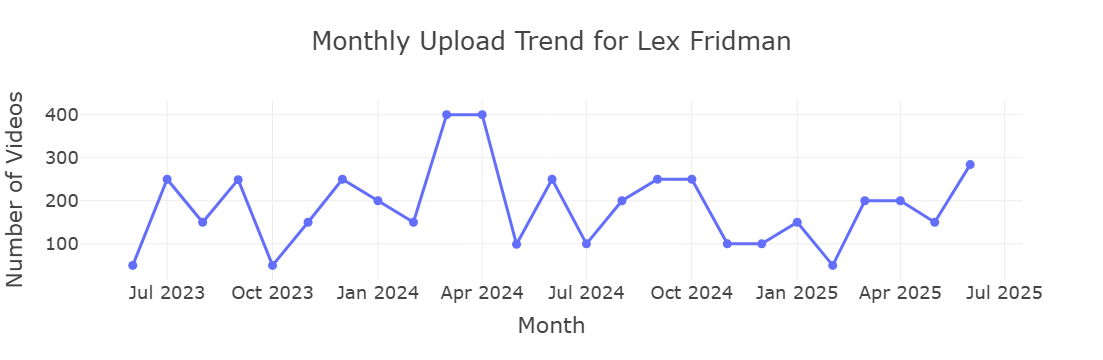

In [15]:
# Convert videoPublishedAt to datetime
merged_df['videoPublishedAt'] = pd.to_datetime(merged_df['videoPublishedAt'])

# Extract month
merged_df['month'] = merged_df['videoPublishedAt'].dt.to_period('M').astype(str)

# Count videos per month
monthly_counts = merged_df.groupby('month').size().reset_index(name='Video Count')

# Plot
fig = px.line(monthly_counts, x='month', y='Video Count',
              title='Monthly Upload Trend for Lex Fridman',
              markers=True)

fig.update_layout(template="presentation",
                  xaxis_title="Month",
                  yaxis_title="Number of Videos",
                  paper_bgcolor="rgba(0, 0, 0, 0)",
                  plot_bgcolor="rgba(0, 0, 0, 0)")

fig.show()

In [17]:
popularity_stats = merged_df[['viewCount', 'videoLikeCount', 'commentCount']].describe()
print(popularity_stats.loc[['mean', '50%', 'std']])

         viewCount  videoLikeCount  commentCount
mean  2.291699e+06    39720.072405   7926.867364
50%   1.406629e+06    22439.000000   3168.000000
std   2.768845e+06    51421.086714  14278.366583


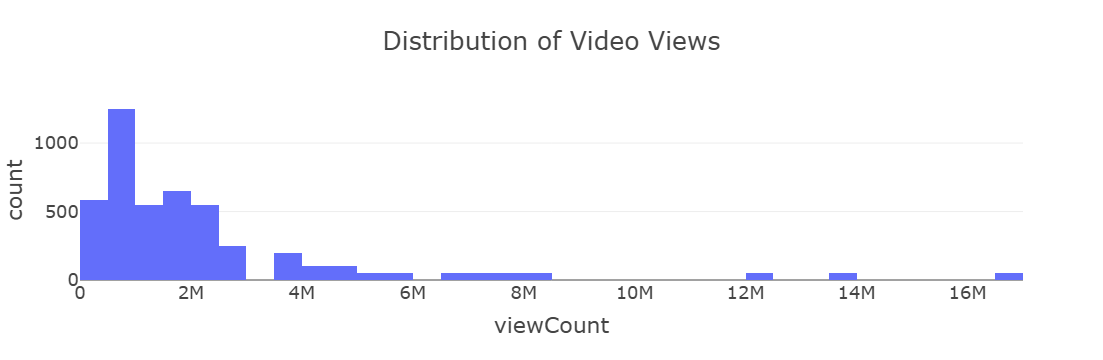

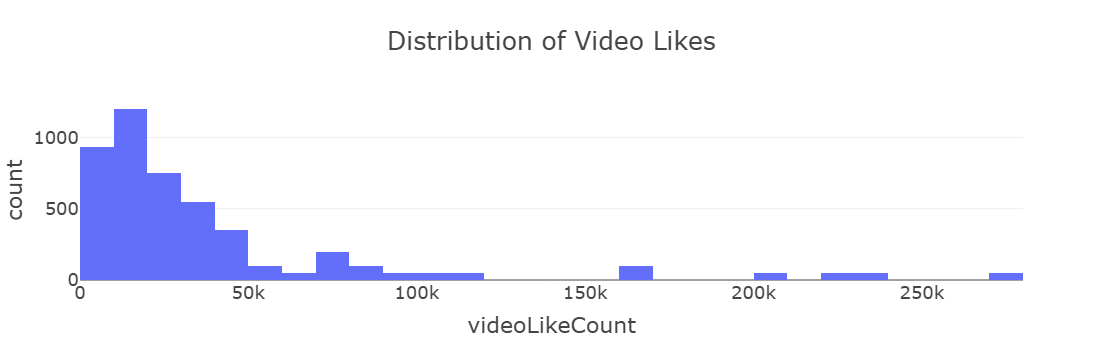

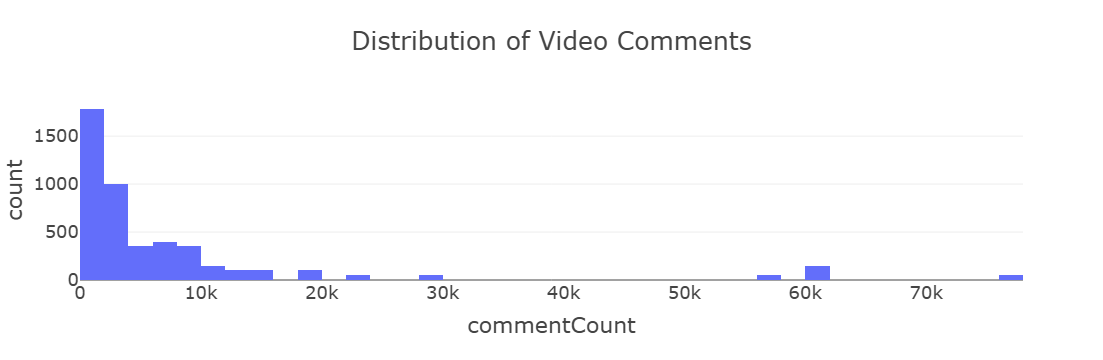

In [19]:
# Views Histogram
fig1 = px.histogram(merged_df, x='viewCount', nbins=50,
                    title='Distribution of Video Views')
fig1.update_layout(template='presentation')
fig1.show()

# Likes Histogram
fig2 = px.histogram(merged_df, x='videoLikeCount', nbins=50,
                    title='Distribution of Video Likes')
fig2.update_layout(template='presentation')
fig2.show()

# Comments Histogram
fig3 = px.histogram(merged_df, x='commentCount', nbins=50,
                    title='Distribution of Video Comments')
fig3.update_layout(template='presentation')
fig3.show()

In [41]:
metrics = ['viewCount', 'videoLikeCount', 'commentCount']

for col in metrics:
    mean_val = merged_df[col].mean()
    median_val = merged_df[col].median()
    std_val = merged_df[col].std()
    
    print(f"\n📊 {col} Stats:")
    print(f"Mean: {mean_val:,.0f}")
    print(f"Median: {median_val:,.0f}")
    print(f"Standard Deviation: {std_val:,.0f}")


📊 viewCount Stats:
Mean: 2,291,699
Median: 1,406,629
Standard Deviation: 2,768,845

📊 videoLikeCount Stats:
Mean: 39,720
Median: 22,439
Standard Deviation: 51,421

📊 commentCount Stats:
Mean: 7,927
Median: 3,168
Standard Deviation: 14,278


In [23]:
# Function to assign sentiment label
def get_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Replace NaNs with empty string
merged_df['clean_text'] = merged_df['clean_text'].fillna("")

# Apply to cleaned text
merged_df['sentiment'] = merged_df['clean_text'].apply(get_sentiment)

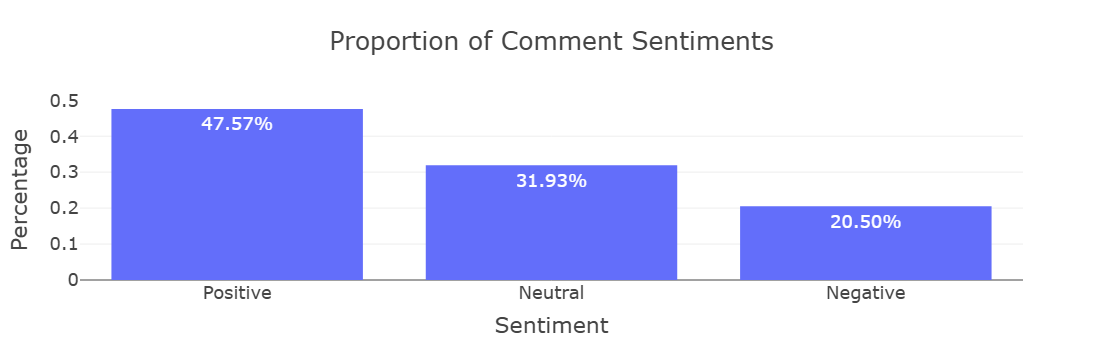

In [25]:
sentiment_counts = merged_df['sentiment'].value_counts(normalize=True).reset_index()
sentiment_counts.columns = ['Sentiment', 'Proportion']

fig = px.bar(sentiment_counts, x='Sentiment', y='Proportion',
             title='Proportion of Comment Sentiments',
             text=sentiment_counts['Proportion'].apply(lambda x: f'{x:.2%}'))

fig.update_layout(template='presentation', yaxis_title='Percentage')
fig.show()

C:\Users\user\AppData\Local\Temp\ipykernel_17620\3658114663.py:8: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



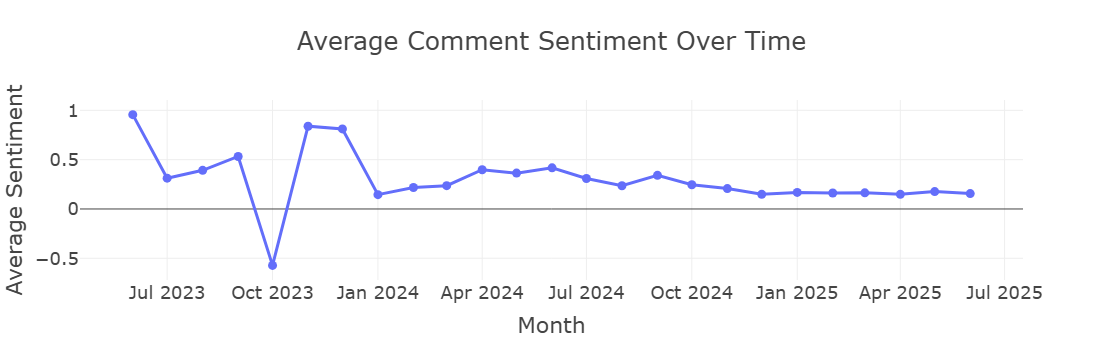

In [27]:
# Convert commentPublishedAt
merged_df['commentPublishedAt'] = pd.to_datetime(merged_df['commentPublishedAt'])

# Get compound score for time series
merged_df['sentiment_score'] = merged_df['clean_text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

# Group by month
merged_df['comment_month'] = merged_df['commentPublishedAt'].dt.to_period('M').astype(str)
monthly_sentiment = merged_df.groupby('comment_month')['sentiment_score'].mean().reset_index()

# Plot
fig = px.line(monthly_sentiment, x='comment_month', y='sentiment_score',
              title='Average Comment Sentiment Over Time', markers=True)

fig.update_layout(template='presentation', xaxis_title='Month', yaxis_title='Average Sentiment')
fig.show()

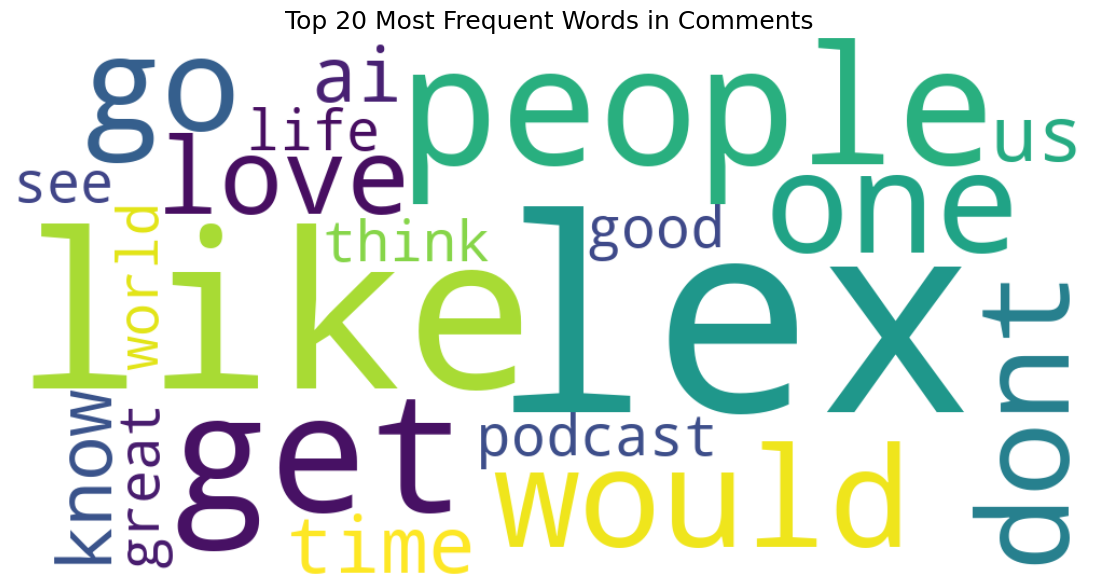

In [31]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all cleaned comment text into a single string
all_text = " ".join(merged_df['clean_text'].dropna())

# Tokenize and count words
word_list = all_text.split()
word_freq = Counter(word_list)
top_20_words = dict(word_freq.most_common(20))

# Create word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(top_20_words)

# Plot
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 20 Most Frequent Words in Comments", fontsize=18)
plt.show()

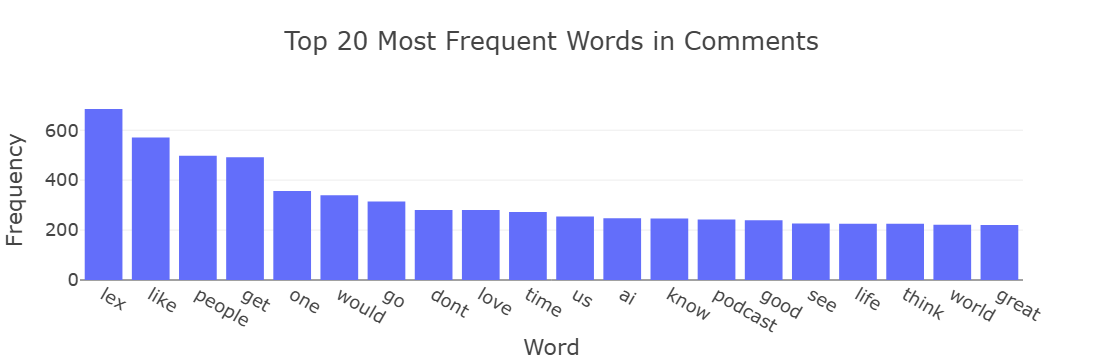

In [33]:
import pandas as pd
import plotly.express as px

# Turn word frequency dict into a DataFrame
word_freq_df = pd.DataFrame(top_20_words.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

# Plot
fig = px.bar(word_freq_df, x='Word', y='Count', title='Top 20 Most Frequent Words in Comments')
fig.update_layout(template='presentation', xaxis_title='Word', yaxis_title='Frequency')
fig.show()

In [35]:
merged_df['tags'].unique()

array(['[]',
       "['Terence Tao', 'alex friedman', 'lex ai', 'lex debate', 'lex freedman', 'lex fridman', 'lex friedman', 'lex interview', 'lex lecture', 'lex mit', 'lex podcast', 'lex transcript']",
       "['Sundar Pichai', 'alex friedman', 'lex ai', 'lex debate', 'lex freedman', 'lex fridman', 'lex friedman', 'lex interview', 'lex lecture', 'lex mit', 'lex podcast', 'lex transcript']",
       "['James Holland', 'alex friedman', 'lex ai', 'lex debate', 'lex freedman', 'lex fridman', 'lex friedman', 'lex interview', 'lex lecture', 'lex mit', 'lex podcast', 'lex transcript']",
       "['Oliver Anthony', 'alex friedman', 'lex ai', 'lex debate', 'lex freedman', 'lex fridman', 'lex friedman', 'lex interview', 'lex lecture', 'lex mit', 'lex podcast', 'lex transcript']",
       "['Janna Levin', 'alex friedman', 'lex ai', 'lex debate', 'lex freedman', 'lex fridman', 'lex friedman', 'lex interview', 'lex lecture', 'lex mit', 'lex podcast', 'lex transcript']",
       "['Tim Sweeney', 'alex 

In [37]:
top_by_views = merged_df.sort_values(by='viewCount', ascending=False).head(20)

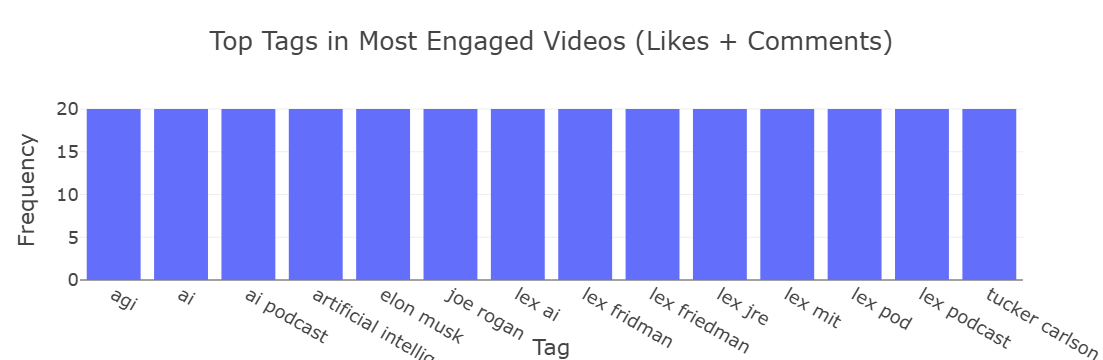

In [39]:
import ast
from collections import Counter

# Calculate engagement score
merged_df['engagement'] = merged_df['videoLikeCount'] + merged_df['commentCount']

# Top 20 most engaged videos
top_engaged = merged_df.sort_values(by='engagement', ascending=False).head(20)

# Parse and collect tags
engaged_tags = []
for tag_list in top_engaged['tags'].dropna():
    if isinstance(tag_list, str):
        try:
            tags = ast.literal_eval(tag_list) if tag_list.startswith("[") else [tag_list]
            engaged_tags.extend(tags)
        except:
            continue

# Count tag frequency
tag_counter = Counter(engaged_tags)
tag_df = pd.DataFrame(tag_counter.items(), columns=['Tag', 'Count']).sort_values(by='Count', ascending=False)

# Plot
fig = px.bar(tag_df.head(15), x='Tag', y='Count',
             title='Top Tags in Most Engaged Videos (Likes + Comments)')
fig.update_layout(template='presentation', xaxis_title='Tag', yaxis_title='Frequency')
fig.show()

C:\Users\user\AppData\Local\Temp\ipykernel_17620\896630903.py:5: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



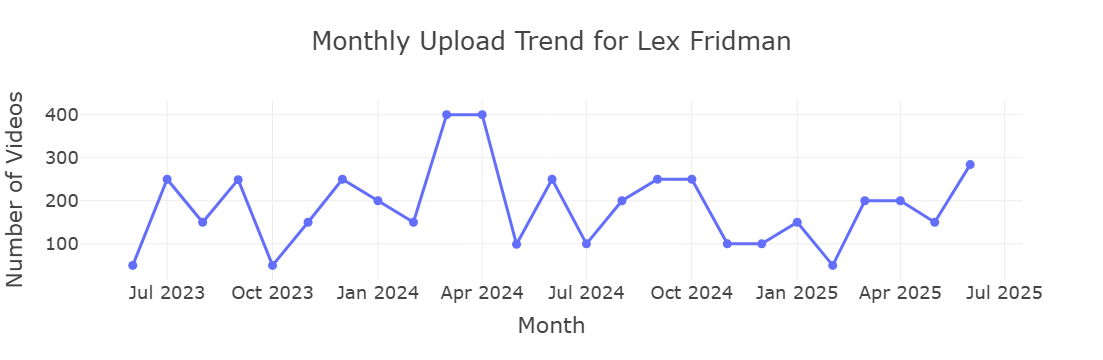

In [55]:
# Convert videoPublishedAt to datetime
merged_df['videoPublishedAt'] = pd.to_datetime(merged_df['videoPublishedAt'])

# Extract month
merged_df['month'] = merged_df['videoPublishedAt'].dt.to_period('M').astype(str)

# Count videos per month
monthly_counts = merged_df.groupby('month').size().reset_index(name='Video Count')

# Plot
import plotly.express as px
fig = px.line(monthly_counts, x='month', y='Video Count',
              title='Monthly Upload Trend for Lex Fridman',
              markers=True)

fig.update_layout(template="presentation",
                  xaxis_title="Month",
                  yaxis_title="Number of Videos",
                  paper_bgcolor="rgba(0, 0, 0, 0)",
                  plot_bgcolor="rgba(0, 0, 0, 0)")

fig.show()

In [57]:
print(monthly_counts)

      month  Video Count
0   2023-06           50
1   2023-07          250
2   2023-08          150
3   2023-09          249
4   2023-10           50
5   2023-11          150
6   2023-12          250
7   2024-01          200
8   2024-02          150
9   2024-03          400
10  2024-04          400
11  2024-05           99
12  2024-06          250
13  2024-07          100
14  2024-08          200
15  2024-09          250
16  2024-10          250
17  2024-11          100
18  2024-12          100
19  2025-01          150
20  2025-02           50
21  2025-03          200
22  2025-04          200
23  2025-05          150
24  2025-06          284


In [59]:
# Calculate engagement score
merged_df['engagement'] = merged_df['videoLikeCount'] + merged_df['commentCount']

# Top 10 most engaged videos
top_engaged = merged_df.sort_values(by='engagement', ascending=False).head(10)

# Display the top engaged videos with their titles and engagement
print(top_engaged[['title', 'videoLikeCount', 'commentCount', 'engagement']])

                                                  title  videoLikeCount  \
3231  Tucker Carlson: Putin, Navalny, Trump, CIA, NS...          271831   
3186  Tucker Carlson: Putin, Navalny, Trump, CIA, NS...          271831   
3204  Tucker Carlson: Putin, Navalny, Trump, CIA, NS...          271831   
3203  Tucker Carlson: Putin, Navalny, Trump, CIA, NS...          271831   
3202  Tucker Carlson: Putin, Navalny, Trump, CIA, NS...          271831   
3201  Tucker Carlson: Putin, Navalny, Trump, CIA, NS...          271831   
3200  Tucker Carlson: Putin, Navalny, Trump, CIA, NS...          271831   
3199  Tucker Carlson: Putin, Navalny, Trump, CIA, NS...          271831   
3232  Tucker Carlson: Putin, Navalny, Trump, CIA, NS...          271831   
3183  Tucker Carlson: Putin, Navalny, Trump, CIA, NS...          271831   

      commentCount  engagement  
3231         60612      332443  
3186         60612      332443  
3204         60612      332443  
3203         60612      332443  
3202     

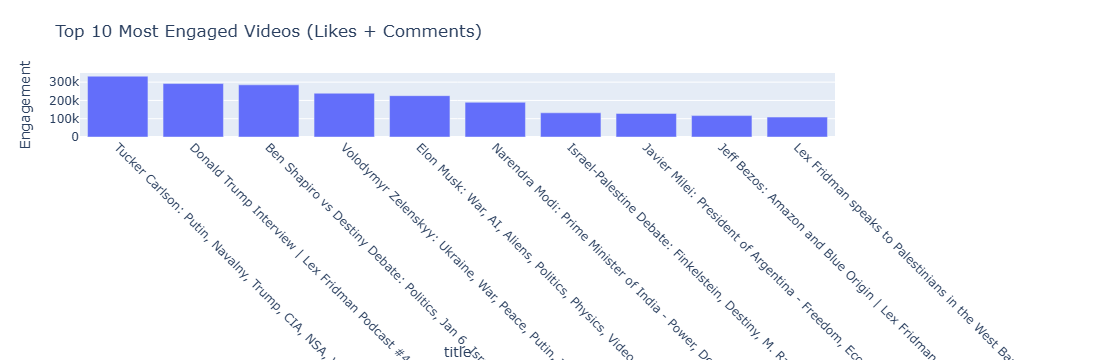

In [69]:
# Calculate engagement
merged_df['Engagement'] = merged_df['videoLikeCount'] + merged_df['commentCount']

# Group by videoId and title, get max engagement per video
top_engaged = merged_df.groupby(['videoId', 'title'], as_index=False)['Engagement'].max()

# Sort and select top 10
top_engaged = top_engaged.sort_values(by='Engagement', ascending=False).head(10)

# Plot
import plotly.express as px
fig = px.bar(top_engaged, x='title', y='Engagement',
             title='Top 10 Most Engaged Videos (Likes + Comments)')
fig.update_layout(xaxis_tickangle=45)
fig.show()

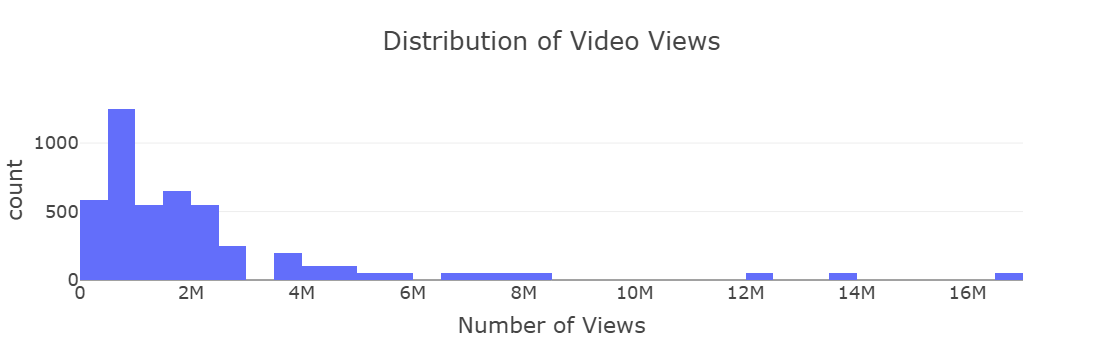

In [73]:
import plotly.express as px

fig = px.histogram(
    merged_df, 
    x='viewCount', 
    nbins=50,
    title='Distribution of Video Views',
    labels={'viewCount': 'Number of Views'}
)
fig.update_layout(template='presentation')
fig.show()